In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler





In [2]:
data=pd.read_csv("/Users/Tara/Downloads/policy_mobility_df.csv")

In [3]:
data

,Unnamed: 0,RegionName,Date,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline
0,0,Alaska,20200301,11.11,10.26,12.12,0.0,19.0,14.5,18.0,5.5,-1.0,11.5
1,1,Alaska,20200302,11.11,10.26,12.12,0.0,6.0,6.5,6.5,0.5,0.0,6.5
2,2,Alaska,20200303,11.11,10.26,12.12,0.0,11.0,10.0,4.0,3.0,0.0,-5.0
3,3,Alaska,20200304,11.11,10.26,12.12,0.0,10.0,8.5,7.5,3.0,-0.5,3.0
4,4,Alaska,20200305,11.11,10.26,12.12,0.0,8.5,7.5,3.0,2.5,-0.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,9341,Wyoming,20200827,37.04,46.15,45.45,50.0,8.0,18.0,17.5,-25.5,3.5,174.5
9342,9342,Wyoming,20200828,37.04,46.15,45.45,50.0,3.5,17.0,19.5,-23.5,3.0,196.0
9343,9343,Wyoming,20200829,37.04,46.15,45.45,50.0,7.0,23.0,44.0,-8.0,-1.0,283.0
9344,9344,Wyoming,20200830,37.04,46.15,45.45,50.0,11.5,20.0,25.5,-7.0,0.0,186.0


In [4]:
# no_sept_data=~data.Date.astype(str).str.contains("202009")
# data=data[no_sept_data]


In [5]:
policy1= ['Mississippi', 'Oklahoma', 'Washington']

policy2= ['Washington DC', 'Florida', 'Hawaii', 'Illinois', 'Indiana', 'Massachusetts', 'Maryland', 'North Carolina', 'New Mexico', 'Nevada', 'Ohio', 'Oregon', 'Virginia', 'West Virginia']

policy3= ['Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Iowa', 'Kentucky', 'Louisiana', 'Maine', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

policy4= ['Alabama', 'Arkansas', 'Idaho', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Montana', 'North Dakota', 'Nebraska', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virgin Islands', 'Wisconsin', 'Wyoming']

In [6]:
mobility2= ['District of Columbia', 'Hawaii', 'Massachusetts']

mobility4= ['Idaho', 'Iowa', 'Maine', 'Montana', 'South Dakota', 'Wyoming']

mobility1= ['Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']

mobility3= ['Arizona', 'California', 'Colorado', 'Delaware', 'Florida', 'Maryland', 'Minnesota', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Rhode Island']


In [7]:
policy_clusters=[]
mobility_clusters=[]
for index, row in data.iterrows():
    if row["RegionName"] in policy1:
        policy_clusters.append(1)
    if row["RegionName"] in policy2:
        policy_clusters.append(2)
    if row["RegionName"] in policy3:
        policy_clusters.append(3)
    if row["RegionName"] in policy4:
        policy_clusters.append(4)
#     if row["RegionName"]=="Washington DC":
#         policy_clusters.append(2)
        

for index, row in data.iterrows():
    if row["RegionName"] in mobility1:
        mobility_clusters.append(1)
    if row["RegionName"] in mobility2:
        mobility_clusters.append(2)
    if row["RegionName"] in mobility3:
        mobility_clusters.append(3)
    if row["RegionName"] in mobility4:
        mobility_clusters.append(4)
    if row["RegionName"]=="Washington DC":
        mobility_clusters.append(2)

        
data["PolicyClusters"]=policy_clusters
data["MobilityClusters"]=mobility_clusters
    

In [8]:
data["AvgMobility"]=(data["retail_and_recreation_percent_change_from_baseline"]+data["grocery_and_pharmacy_percent_change_from_baseline"]+data["transit_stations_percent_change_from_baseline"]+data["workplaces_percent_change_from_baseline"])/4

data

,Unnamed: 0,RegionName,Date,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,parks_percent_change_from_baseline,PolicyClusters,MobilityClusters,AvgMobility
0,0,Alaska,20200301,11.11,10.26,12.12,0.0,19.0,14.5,18.0,5.5,-1.0,11.5,3,1,14.250
1,1,Alaska,20200302,11.11,10.26,12.12,0.0,6.0,6.5,6.5,0.5,0.0,6.5,3,1,4.875
2,2,Alaska,20200303,11.11,10.26,12.12,0.0,11.0,10.0,4.0,3.0,0.0,-5.0,3,1,7.000
3,3,Alaska,20200304,11.11,10.26,12.12,0.0,10.0,8.5,7.5,3.0,-0.5,3.0,3,1,7.250
4,4,Alaska,20200305,11.11,10.26,12.12,0.0,8.5,7.5,3.0,2.5,-0.5,6.0,3,1,5.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,9341,Wyoming,20200827,37.04,46.15,45.45,50.0,8.0,18.0,17.5,-25.5,3.5,174.5,4,4,4.500
9342,9342,Wyoming,20200828,37.04,46.15,45.45,50.0,3.5,17.0,19.5,-23.5,3.0,196.0,4,4,4.125
9343,9343,Wyoming,20200829,37.04,46.15,45.45,50.0,7.0,23.0,44.0,-8.0,-1.0,283.0,4,4,16.500
9344,9344,Wyoming,20200830,37.04,46.15,45.45,50.0,11.5,20.0,25.5,-7.0,0.0,186.0,4,4,12.500


In [9]:
first_of_march_indices=list(data[data["Date"]==20200301].index)
first_of_march_indices=first_of_march_indices[1:]

In [10]:
# index_ny=data[data["Date"]==20200731]
# index_ny

In [11]:
data2col=pd.DataFrame(data[["StringencyIndexForDisplay","GovernmentResponseIndexForDisplay","ContainmentHealthIndexForDisplay","EconomicSupportIndexForDisplay", "PolicyClusters", "MobilityClusters","AvgMobility"]])






In [12]:
data2col

,StringencyIndexForDisplay,GovernmentResponseIndexForDisplay,ContainmentHealthIndexForDisplay,EconomicSupportIndexForDisplay,PolicyClusters,MobilityClusters,AvgMobility
0,11.11,10.26,12.12,0.0,3,1,14.250
1,11.11,10.26,12.12,0.0,3,1,4.875
2,11.11,10.26,12.12,0.0,3,1,7.000
3,11.11,10.26,12.12,0.0,3,1,7.250
4,11.11,10.26,12.12,0.0,3,1,5.375
...,...,...,...,...,...,...,...
9341,37.04,46.15,45.45,50.0,4,4,4.500
9342,37.04,46.15,45.45,50.0,4,4,4.125
9343,37.04,46.15,45.45,50.0,4,4,16.500
9344,37.04,46.15,45.45,50.0,4,4,12.500


In [13]:
data2col["AvgMobility"].mean()


-17.548102454172803

In [14]:
data2col=data2col.to_numpy()
data2col

array([[11.11 , 10.26 , 12.12 , ...,  3.   ,  1.   , 14.25 ],
       [11.11 , 10.26 , 12.12 , ...,  3.   ,  1.   ,  4.875],
       [11.11 , 10.26 , 12.12 , ...,  3.   ,  1.   ,  7.   ],
       ...,
       [37.04 , 46.15 , 45.45 , ...,  4.   ,  4.   , 16.5  ],
       [37.04 , 46.15 , 45.45 , ...,  4.   ,  4.   , 12.5  ],
       [37.04 , 46.15 , 45.45 , ...,  4.   ,  4.   ,  8.875]])

In [15]:
# convert series to supervised learning
# FROM https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

data2col=series_to_supervised(data2col)

In [16]:
data2col=pd.DataFrame(data2col)
data2col=data2col[~data2col.index.isin(first_of_march_indices)]
# data2col[data2col["var7(t)"]==-25.382353]

In [17]:
data2col

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,11.11,10.26,12.12,0.0,3.0,1.0,14.250,11.11,10.26,12.12,0.0,3.0,1.0,4.875
2,11.11,10.26,12.12,0.0,3.0,1.0,4.875,11.11,10.26,12.12,0.0,3.0,1.0,7.000
3,11.11,10.26,12.12,0.0,3.0,1.0,7.000,11.11,10.26,12.12,0.0,3.0,1.0,7.250
4,11.11,10.26,12.12,0.0,3.0,1.0,7.250,11.11,10.26,12.12,0.0,3.0,1.0,5.375
5,11.11,10.26,12.12,0.0,3.0,1.0,5.375,11.11,10.26,12.12,0.0,3.0,1.0,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,37.04,46.15,45.45,50.0,4.0,4.0,3.875,37.04,46.15,45.45,50.0,4.0,4.0,4.500
9342,37.04,46.15,45.45,50.0,4.0,4.0,4.500,37.04,46.15,45.45,50.0,4.0,4.0,4.125
9343,37.04,46.15,45.45,50.0,4.0,4.0,4.125,37.04,46.15,45.45,50.0,4.0,4.0,16.500
9344,37.04,46.15,45.45,50.0,4.0,4.0,16.500,37.04,46.15,45.45,50.0,4.0,4.0,12.500


In [18]:
# march_test_rows=list(data2col[data2col["var1(t)"]==20200331.0].index)
# april_test_rows=list(data2col[data2col["var1(t)"]==20200430.0].index)
# may_test_rows=list(data2col[data2col["var1(t)"]==20200531.0].index)
# june_test_rows=list(data2col[data2col["var1(t)"]==20200630.0].index)
# july_test_rows=list(data2col[data2col["var1(t)"]==20200731.0].index)
# august_test_rows=list(data2col[data2col["var1(t)"]==20200831.0].index)
# test_indices=march_test_cols+april_test_cols+may_test_cols+june_test_cols+july_test_cols+august_test_cols
# test_indices
test_indices=[30,213,397,
 581,765, 949, 1133,1317,1501,1683,1867,2051, 2235, 2419, 2603,
 2787,
 2971,
 3155,
 3339,
 3523,
 3702,
 3886,
 4070,
 4243,
 4427,
 4611,
 4795,
 4979,
 5163,
 5336,
 5520,
 5704,
 5888,
 6072,
 6256,
 6440,
 6624,
 6808,
 6988,
 7172,
 7356,
 7539,
 7722,
 7906,
 8090,
 8274,
 8458,
 8641,
 8825,
 9009,
 9193,
 60,
 243,
 427,
 611,
 795,
 979,
 1163,
 1347,
 1531,
 1713,
 1897,
 2081,
 2265,
 2449,
 2633,
 2817,
 3001,
 3185,
 3369,
 3553,
 3732,
 3916,
 4100,
 4273,
 4457,
 4641,
 4825,
 5009,
 5193,
 5366,
 5550,
 5734,
 5918,
 6102,
 6286,
 6470,
 6654,
 6836,
 7018,
 7202,
 7386,
 7569,
 7752,
 7936,
 8120,
 8304,
 8488,
 8671,
 8855,
 9039,
 9223,
 91,
 274,
 458,
 642,
 826,
 1010,
 1194,
 1378,
 1562,
 1744,
 1928,
 2112,
 2296,
 2480,
 2664,
 2848,
 3032,
 3216,
 3400,
 3584,
 3763,
 3947,
 4131,
 4304,
 4488,
 4672,
 4856,
 5040,
 5223,
 5397,
 5581,
 5765,
 5949,
 6133,
 6317,
 6501,
 6685,
 6865,
 7049,
 7233,
 7417,
 7600,
 7783,
 7967,
 8151,
 8335,
 8519,
 8702,
 8886,
 9070,
 9254,
 121,
 304,
 488,
 672,
 856,
 1040,
 1224,
 1408,
 1592,
 1774,
 1958,
 2142,
 2326,
 2510,
 2694,
 2878,
 3062,
 3246,
 3430,
 3614,
 3793,
 3977,
 4161,
 4334,
 4518,
 4702,
 4886,
 5070,
 5249,
 5427,
 5611,
 5795,
 5979,
 6163,
 6347,
 6531,
 6715,
 6895,
 7079,
 7263,
 7447,
 7630,
 7813,
 7997,
 8181,
 8365,
 8549,
 8732,
 8916,
 9100,
 9284,
 152,
 335,
 519,
 703,
 887,
 1071,
 1255,
 1439,
 1622,
 1805,
 1989,
 2173,
 2357,
 2541,
 2725,
 2909,
 3093,
 3277,
 3461,
 3645,
 3824,
 4008,
 4192,
 4365,
 4549,
 4733,
 4917,
 5101,
 5275,
 5458,
 5642,
 5826,
 6010,
 6194,
 6378,
 6562,
 6746,
 6926,
 7110,
 7294,
 7478,
 7661,
 7844,
 8028,
 8212,
 8396,
 8579,
 8763,
 8947,
 9131,
 9314,
 183,
 366,
 550,
 734,
 918,
 1102,
 1286,
 1470,
 1652,
 1836,
 2020,
 2204,
 2388,
 2572,
 2756,
 2940,
 3124,
 3308,
 3492,
 3855,
 4039,
 4396,
 4580,
 4764,
 4948,
 5132,
 5305,
 5489,
 5673,
 5857,
 6041,
 6225,
 6409,
 6593,
 6777,
 6957,
 7141,
 7325,
 7509,
 7691,
 7875,
 8059,
 8243,
 8427,
 8610,
 8794,
 8978,
 9162,
 9345]

In [19]:
data2col

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,11.11,10.26,12.12,0.0,3.0,1.0,14.250,11.11,10.26,12.12,0.0,3.0,1.0,4.875
2,11.11,10.26,12.12,0.0,3.0,1.0,4.875,11.11,10.26,12.12,0.0,3.0,1.0,7.000
3,11.11,10.26,12.12,0.0,3.0,1.0,7.000,11.11,10.26,12.12,0.0,3.0,1.0,7.250
4,11.11,10.26,12.12,0.0,3.0,1.0,7.250,11.11,10.26,12.12,0.0,3.0,1.0,5.375
5,11.11,10.26,12.12,0.0,3.0,1.0,5.375,11.11,10.26,12.12,0.0,3.0,1.0,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9341,37.04,46.15,45.45,50.0,4.0,4.0,3.875,37.04,46.15,45.45,50.0,4.0,4.0,4.500
9342,37.04,46.15,45.45,50.0,4.0,4.0,4.500,37.04,46.15,45.45,50.0,4.0,4.0,4.125
9343,37.04,46.15,45.45,50.0,4.0,4.0,4.125,37.04,46.15,45.45,50.0,4.0,4.0,16.500
9344,37.04,46.15,45.45,50.0,4.0,4.0,16.500,37.04,46.15,45.45,50.0,4.0,4.0,12.500


In [20]:
# march_test_rows=list(data2col[data2col["var1(t)"]==20200331.0].index)
# april_test_rows=list(data2col[data2col["var1(t)"]==20200430.0].index)
# may_test_rows=list(data2col[data2col["var1(t)"]==20200531.0].index)
# june_test_rows=list(data2col[data2col["var1(t)"]==20200630.0].index)
# july_test_rows=list(data2col[data2col["var1(t)"]==20200731.0].index)
# august_test_rows=list(data2col[data2col["var1(t)"]==20200831.0].index)
# test_indices=march_test_cols+april_test_cols+may_test_cols+june_test_cols+july_test_cols+august_test_cols
# test_indices

In [21]:
train=data2col[~data2col.index.isin(test_indices)]
test=data2col[data2col.index.isin(test_indices)]


In [22]:
train

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,11.11,10.26,12.12,0.0,3.0,1.0,14.250000,11.11,10.26,12.12,0.0,3.0,1.0,4.875
2,11.11,10.26,12.12,0.0,3.0,1.0,4.875000,11.11,10.26,12.12,0.0,3.0,1.0,7.000
3,11.11,10.26,12.12,0.0,3.0,1.0,7.000000,11.11,10.26,12.12,0.0,3.0,1.0,7.250
4,11.11,10.26,12.12,0.0,3.0,1.0,7.250000,11.11,10.26,12.12,0.0,3.0,1.0,5.375
5,11.11,10.26,12.12,0.0,3.0,1.0,5.375000,11.11,10.26,12.12,0.0,3.0,1.0,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9340,37.04,46.15,45.45,50.0,4.0,4.0,2.916667,37.04,46.15,45.45,50.0,4.0,4.0,3.875
9341,37.04,46.15,45.45,50.0,4.0,4.0,3.875000,37.04,46.15,45.45,50.0,4.0,4.0,4.500
9342,37.04,46.15,45.45,50.0,4.0,4.0,4.500000,37.04,46.15,45.45,50.0,4.0,4.0,4.125
9343,37.04,46.15,45.45,50.0,4.0,4.0,4.125000,37.04,46.15,45.45,50.0,4.0,4.0,16.500


In [23]:
train=train.values
test=test.values

In [24]:
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X

array([[11.11, 10.26, 12.12, ...,  0.  ,  3.  ,  1.  ],
       [11.11, 10.26, 12.12, ...,  0.  ,  3.  ,  1.  ],
       [11.11, 10.26, 12.12, ...,  0.  ,  3.  ,  1.  ],
       ...,
       [37.04, 46.15, 45.45, ..., 50.  ,  4.  ,  4.  ],
       [37.04, 46.15, 45.45, ..., 50.  ,  4.  ,  4.  ],
       [37.04, 46.15, 45.45, ..., 50.  ,  4.  ,  4.  ]])

In [25]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8991, 1, 13) (8991,) (304, 1, 13) (304,)


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint


In [27]:
lstm_num=22
dense1_num=19
dense2_num=11
dense3_num=11
epochs_num=16
batchsize_num=80

model=Sequential()
model.add(LSTM(lstm_num, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(dense1_num, activation="relu"))
model.add(Dense(dense2_num, activation="relu"))
model.add(Dense(dense3_num, activation="relu"))
model.add(Dense(1))

model.compile(
  optimizer='adam',
  loss='mae',
)

fit=model.fit(
      train_X,
      train_y,
      epochs=epochs_num,
      validation_data=(test_X, test_y),
      batch_size=batchsize_num,

    )
model.evaluate(test_X, test_y)
# print([lstm_num, dense1_num, dense2_num, dense3_num, epochs_num, batchsize_num])

Epoch 1/16
113/113 [==============================] - 1s 13ms/step - loss: 16.9451 - val_loss: 12.7032
Epoch 2/16
113/113 [==============================] - 0s 4ms/step - loss: 7.1606 - val_loss: 4.3932
Epoch 3/16
113/113 [==============================] - 0s 4ms/step - loss: 4.6715 - val_loss: 3.9677
Epoch 4/16
113/113 [==============================] - 0s 4ms/step - loss: 4.4317 - val_loss: 3.7600
Epoch 5/16
113/113 [==============================] - 0s 4ms/step - loss: 4.3092 - val_loss: 3.7206
Epoch 6/16
113/113 [==============================] - 0s 3ms/step - loss: 4.2979 - val_loss: 3.7231
Epoch 7/16
113/113 [==============================] - 0s 3ms/step - loss: 4.2204 - val_loss: 3.6534
Epoch 8/16
113/113 [==============================] - 0s 3ms/step - loss: 4.2093 - val_loss: 3.4994
Epoch 9/16
113/113 [==============================] - 0s 4ms/step - loss: 4.1705 - val_loss: 3.7262
Epoch 10/16
113/113 [==============================] - 0s 4ms/step - loss: 4.1839 - val_loss: 3.4

3.3363547325134277

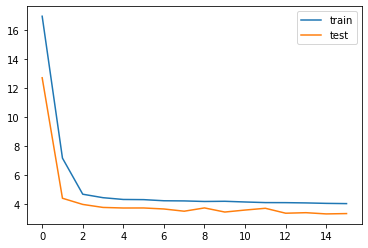

In [28]:
from matplotlib import pyplot
pyplot.plot(fit.history['loss'], label='train')
pyplot.plot(fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
model.evaluate(test_X, test_y)

10/10 [==============================] - 0s 1ms/step - loss: 3.3364


3.3363547325134277

In [122]:
# preparing data so that the model can predict the average mobility in connecticut on september 11,2020


data_to_predict=pd.read_csv("/Users/Tara/Downloads/september_CT_data.csv")
data_to_predict["AvgMobility"]=(data_to_predict["retail_and_recreation_percent_change_from_baseline"]+data_to_predict["grocery_and_pharmacy_percent_change_from_baseline"]+data_to_predict["transit_stations_percent_change_from_baseline"]+data_to_predict["workplaces_percent_change_from_baseline"])/4
data_to_predict["MobilityClusters"]=1
data_to_predict["PolicyClusters"]=3
data_to_predict=pd.DataFrame(data_to_predict[["StringencyIndexForDisplay","GovernmentResponseIndexForDisplay","ContainmentHealthIndexForDisplay","EconomicSupportIndexForDisplay", "PolicyClusters", "MobilityClusters","AvgMobility"]])
data_to_predict=series_to_supervised(data_to_predict)
real_ct_mobility_sept11= float(data_to_predict["var7(t)"])
data_to_predict.drop(["var7(t)"], axis=1, inplace=True)
data_to_predict=data_to_predict.values
data_to_predict = data_to_predict.reshape((data_to_predict.shape[0], 1, data_to_predict.shape[1]))


In [123]:
prediction=float(model.predict(data_to_predict))


print("Model's prediction for Connecticut's average mobility on 9/11/2020: "+str(prediction))

Model's prediction for Connecticut's average mobility on 9/11/2020: -15.043306350708008


In [124]:
print("True value for Connecticut's average mobility on 9/11/2020: "+str(real_ct_mobility_sept11))

True value for Connecticut's average mobility on 9/11/2020: -14.3125
